Import necessary libraries

In [24]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Collect all urls into a list

In [2]:
url_2020 = 'https://www.fantasypros.com/nfl/stats/qb.php?year=2020'
url_2019 = 'https://www.fantasypros.com/nfl/stats/qb.php?year=2019'
url_2018 = 'https://www.fantasypros.com/nfl/stats/qb.php?year=2018'
url_2017 = 'https://www.fantasypros.com/nfl/stats/qb.php?year=2017'
url_2016 = 'https://www.fantasypros.com/nfl/stats/qb.php?year=2016'
url_list = [url_2020, url_2019, url_2018, url_2017, url_2016]

Get the table data from the website

In [3]:
# Dataframe list to concatenate later
df_list = list()

year = 2020
# Loop through list of urls
for url in url_list:
    # Get each link and create a soup object
    r = requests.get(url)
    soup = bs(r.content)
    # Select the table from each link (index 0 to choose the first table from a list of tables)
    table = soup.select('table')[0]
    # Find the column names and place them into a list which will be used for the dataframe
    columns = table.find('thead').find_all('th')
    column_names = [column.get_text() for column in columns]
    column_names[10] = 'RATT'
    column_names[11] = 'RYDS'
    column_names[12] = 'RTD'
    column_names[15] = 'FPTS'
    # Find all table rows and collect them into a list with the row data in each index
    table_rows = table.find('tbody').find_all('tr')
    l = []
    for tr in table_rows:
        td = tr.find_all('td')
        row = [str(tr.get_text()).strip() for tr in td]
        # Removing team name and blank text from the end of each player (because players have likely changed teams over the years)
        row[1] = re.sub("([\(\[]).*?([\)\]])", "\g<1>\g<2>", row[1])
        row[1] = row[1].strip(' ()')
        # Converting all row values to the correct type we want to work with inside the dataframe
        row[17] = row[17].strip('%')
        row[5] = row[5].replace(',','')
        row[11] = row[11].replace(',','')
        l.append(row)
    # Create a dataframe for each table and concatenate them
    df = pd.DataFrame(l, columns = column_names)
    df['Rank'] = df['Rank'].astype('int')
    df['CMP'] = df['CMP'].astype('int')
    df['ATT'] = df['ATT'].astype('int')
    df['PCT'] = df['PCT'].astype('float')
    df['YDS'] = df['YDS'].astype('int')
    df['Y/A'] = df['Y/A'].astype('float')
    df['TD'] = df['TD'].astype('int')
    df['INT'] = df['INT'].astype('int')
    df['SACKS'] = df['SACKS'].astype('int')
    df['RATT'] = df['RATT'].astype('int')
    df['RYDS'] = df['RYDS'].astype('int')
    df['RTD'] = df['RTD'].astype('int')
    df['FL'] = df['FL'].astype('int')
    df['G'] = df['G'].astype('int')
    df['FPTS'] = df['FPTS'].astype('float')
    df['FPTS/G'] = df['FPTS/G'].astype('float')
    df['ROST'] = df['ROST'].astype('float')
    year = year - 1
    df_list.append(df)

# Concatenate all of the dataframes
df = pd.concat(df_list)
df.reset_index(drop = True, inplace = True)
# DF with all stats combined
total_df = df.groupby(['Player'], as_index = False).mean()
total_df

,Player,Rank,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,RATT,RYDS,RTD,FL,G,FPTS,FPTS/G,ROST
0,AJ McCarron,64.000000,6.000000,11.000000,48.020000,63.800000,6.70,0.000000,0.200000,1.600000,1.600000,7.4,0.200000,0.000000,2.200000,4.300000,1.460000,0.0
1,Aaron Rodgers,9.800000,330.400000,508.000000,65.080000,3767.600000,7.38,31.000000,4.800000,32.400000,43.600000,219.2,2.000000,2.800000,14.200000,298.220000,20.720000,94.8
2,Alex Smith,35.000000,208.400000,314.800000,52.760000,2261.200000,5.62,11.400000,5.200000,21.400000,31.800000,132.0,1.400000,1.200000,9.800000,147.300000,11.680000,5.0
3,Alex Tanney,68.500000,0.500000,0.500000,50.000000,0.500000,0.50,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
4,Andrew Luck,25.333333,258.666667,394.666667,43.600000,2944.333333,5.00,23.333333,9.333333,19.666667,36.666667,163.0,0.666667,2.000000,10.666667,211.566667,13.633333,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Tua Tagovailoa,32.000000,186.000000,290.000000,64.100000,1814.000000,6.30,11.000000,5.000000,20.000000,36.000000,109.0,3.000000,1.000000,10.000000,140.400000,14.000000,63.7
136,Tyler Bray,73.666667,0.333333,2.000000,6.666667,6.000000,1.20,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.333333,1.000000,-0.433333,-0.433333,0.0
137,Tyler Huntley,68.000000,3.000000,5.000000,60.000000,15.000000,3.00,0.000000,0.000000,0.000000,10.000000,23.0,0.000000,0.000000,2.000000,2.900000,1.500000,0.2
138,Tyrod Taylor,37.000000,118.800000,195.400000,58.740000,1307.200000,6.32,6.800000,2.400000,20.600000,42.200000,229.2,2.200000,0.800000,8.800000,109.980000,9.720000,0.1


### Data visualizations:

Graph of total points scored:

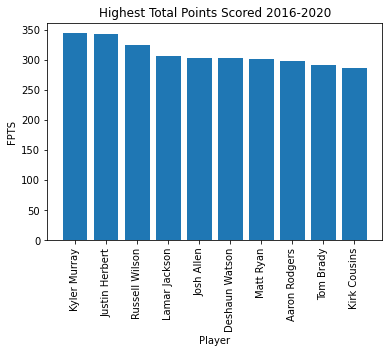

In [4]:
fpts_df = total_df.sort_values('FPTS', ascending = False)
plt.bar(fpts_df['Player'][:10], fpts_df['FPTS'][:10])
plt.xlabel('Player')
plt.ylabel('FPTS')
plt.title('Highest Total Points Scored 2016-2020')
plt.xticks(rotation = 90)
plt.show()

Graph of PPG:

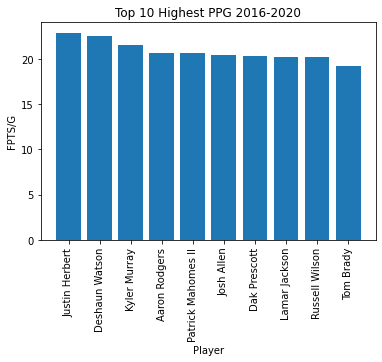

In [5]:
fpts_g_df = total_df.sort_values('FPTS/G', ascending = False)
plt.bar(fpts_g_df['Player'][:10], fpts_g_df['FPTS/G'][:10])
plt.xlabel('Player')
plt.ylabel('FPTS/G')
plt.title('Top 10 Highest PPG 2016-2020')
plt.xticks(rotation = 90)
plt.show()

List of all players on the highest PPG and highest point totals:

In [6]:
ppg_list = fpts_g_df['Player'][:10]
tot_list = fpts_df['Player'][:10]
best_players = []
for player_one in ppg_list:
    for player_two in tot_list:
        if player_one == player_two:
            best_players.append(player_one)
for count in range(len(best_players)):
    print(str(count + 1) + ': ' + str(best_players[count]))

1: Justin Herbert
2: Deshaun Watson
3: Kyler Murray
4: Aaron Rodgers
5: Josh Allen
6: Lamar Jackson
7: Russell Wilson
8: Tom Brady


Trying to collect relevant statistics:

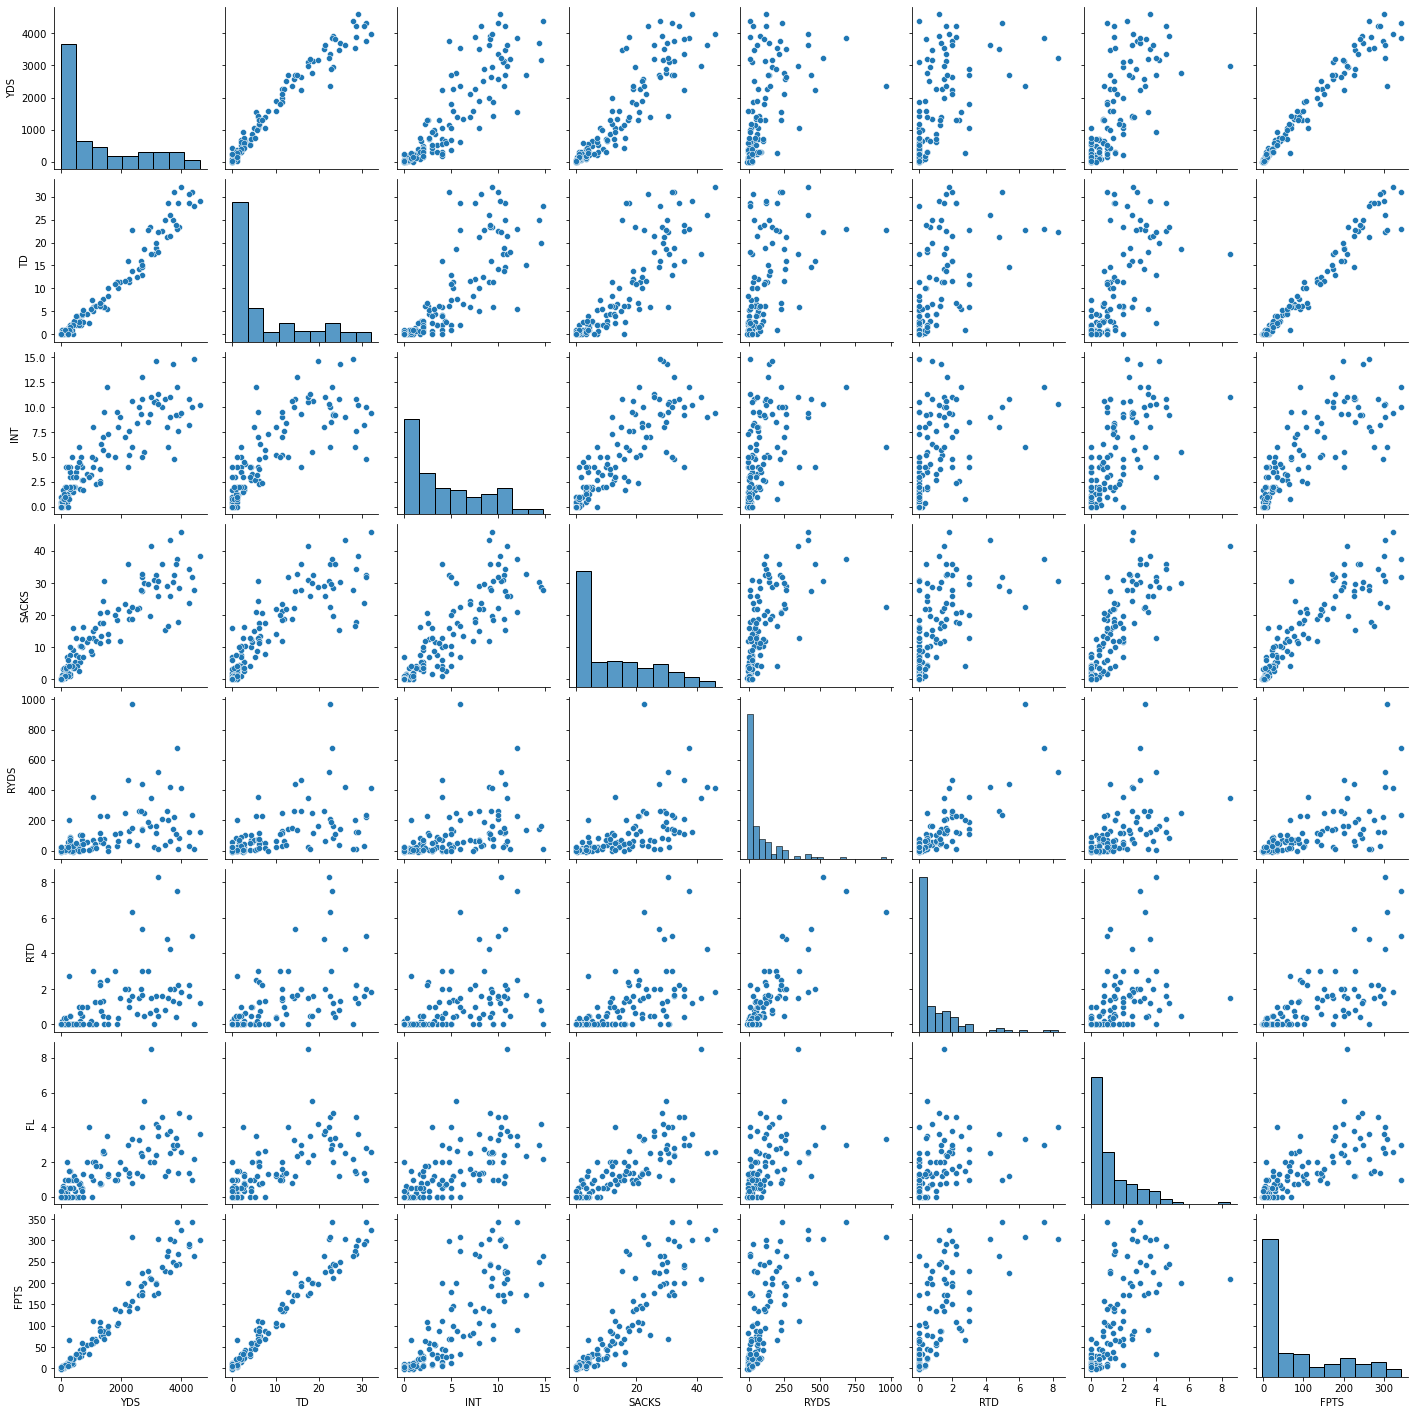

In [13]:
relevant = total_df[['YDS', 'TD', 'INT', 'SACKS', 'RYDS', 'RTD', 'FL', 'FPTS']]
sns.pairplot(relevant)
plt.show()

Correlation plot:

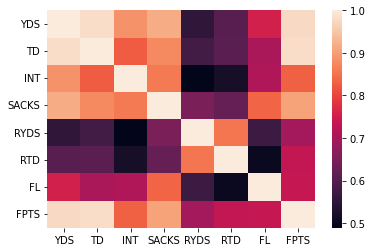

In [23]:
correlation = relevant.corr()
sns.heatmap(correlation)
plt.show()

We can see that YDS (passing yards) and TDs (passing touchdowns) have the highest correlation to FPTS (total fantasy points). This aligns with the scoring system in fantasy football leagues, and we can confirm the relationship we expected. Now we want to take a deeper dive into these correlations...